# NLP 기초 Assignment
## NLP 제대로 맛보기 - spam.csv를 가지고 유의미한 해석을 도출해주세요!

In [50]:
# 필요한 모듈 불러오기
import pandas as pd

## Load Data
- 보시면 아시다시피 spam.csv는 라벨이 있는 데이터입니다. 물론 8주차 주제가 텍스트 기초인만큼 텍스트만 활용하셔도 되고, 라벨까지 활용하셔서 모델을 돌려보셔도 좋습니다 :)

In [107]:
spam = pd.read_csv('spam.csv')

In [108]:
spam.head(6)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...


In [109]:
spam.iloc[5]['v2']

"FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv"

## Tokenizing
- 실습코드에서는 한국어 대상이라 konlpy를 다뤘지만, 영어는 nltk 모듈을 쓸 수 있습니다. 의미 있는 토큰으로 쪼개고 불용어도 처리해보세요! 현존하는 불용어 리스트를 사용해도 좋고, 새롭게 만들어도 좋습니다. 특수문자는 없애주고, 모두 소문자로 변환해주는 전처리도 필요하겠죠?

In [125]:
origin_spam_text = spam['v2'].values
origin_spam_text = list(origin_spam_text)
origin_spam_text[0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

### 소문자로 변환

In [126]:
spam_text = [i.lower() for i in origin_spam_text]
spam_text[0]

'go until jurong point, crazy.. available only in bugis n great world la e buffet... cine there got amore wat...'

### 특수문자 삭제
공백, 숫자, 알파벳대소문자, 쉼표(쉼표를 삭제하면 토큰화할때 영향이 가서 토큰화한 후에 삭제)가 아닌 것들은 삭제

In [127]:
import re

spam_text = [re.sub(r"[^a-zA-Z0-9\s\']","",i) for i in spam_text] 
spam_text[13]

"i've been searching for the right words to thank you for this breather i promise i wont take your help for granted and will fulfil my promise you have been wonderful and a blessing at all times"

### 토큰화

단어 의미단위로 나누는 word_tokenizer 외에도 아래에서 볼 수 있듯이 많은 토크나이저들이있습니다. 

공백을 기준으로 토큰화하는 whitespace tokenizer, 

구두점을 기준으로 나누는 wordpunct tokenizer, 

정규표현식으로 나누는 지점을 지정해서 나눌 수 있는 regextokenizer등이 있습니다. 

![word](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=http%3A%2F%2Fcfile21.uf.tistory.com%2Fimage%2F2248D14C584FE55433BEB1)

wordpunct tokenizer, regextokenizer 등은 소수점까지 나눠버리는 문제점이 있어서 word tokenizer를 사용하겠습니다. 

그러나 word_tokenizer를 사용하면 아래와 같이 따옴표가 남는 경우가 있는데, 이러면 불용어 처리할 때 잡히지 않아서 따로 따옴표를 또 삭제하겠습니다.

In [196]:
stop_words = set(stopwords.words('english')) 
"'ve" in stop_words

False

In [190]:
origin_spam_text[13]

"I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times."

In [197]:
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')
print(tokenizer.tokenize(origin_spam_text[13]))
print('-'*50)
from nltk.tokenize import word_tokenize
print(word_tokenize(origin_spam_text[13]))

['I', 've', 'been', 'searching', 'for', 'the', 'right', 'words', 'to', 'thank', 'you', 'for', 'this', 'breather', 'I', 'promise', 'i', 'wont', 'take', 'your', 'help', 'for', 'granted', 'and', 'will', 'fulfil', 'my', 'promise', 'You', 'have', 'been', 'wonderful', 'and', 'a', 'blessing', 'at', 'all', 'times']
--------------------------------------------------
['I', "'ve", 'been', 'searching', 'for', 'the', 'right', 'words', 'to', 'thank', 'you', 'for', 'this', 'breather', '.', 'I', 'promise', 'i', 'wont', 'take', 'your', 'help', 'for', 'granted', 'and', 'will', 'fulfil', 'my', 'promise', '.', 'You', 'have', 'been', 'wonderful', 'and', 'a', 'blessing', 'at', 'all', 'times', '.']


In [96]:
import nltk
from nltk.tokenize import word_tokenize

nltk.download('punkt')

In [128]:
token_spam_text = [word_tokenize(i) for i in spam_text]

In [138]:
token_spam_text_done = []
for i in token_spam_text:
    result = []
    for ii in i:
        result.append(re.sub(r"[\']","",ii)) #따옴표삭제
    token_spam_text_done.append(result)
token_spam_text_done[13:15]

[['i',
  've',
  'been',
  'searching',
  'for',
  'the',
  'right',
  'words',
  'to',
  'thank',
  'you',
  'for',
  'this',
  'breather',
  'i',
  'promise',
  'i',
  'wont',
  'take',
  'your',
  'help',
  'for',
  'granted',
  'and',
  'will',
  'fulfil',
  'my',
  'promise',
  'you',
  'have',
  'been',
  'wonderful',
  'and',
  'a',
  'blessing',
  'at',
  'all',
  'times'],
 ['i', 'have', 'a', 'date', 'on', 'sunday', 'with', 'will']]

### 불용어 처리

In [116]:
from nltk.corpus import stopwords 

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ann99\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [46]:
print('영어 불용어 갯수:',len(nltk.corpus.stopwords.words('english')))

영어 불용어 갯수: 179


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ann99\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [139]:
stop_words_spam_text = []
stop_words = set(stopwords.words('english')) 

for sentence in token_spam_text_done:
    result = []
    for token in sentence: 
        if token not in stop_words: 
            result.append(token)
    stop_words_spam_text.append(result)

In [140]:
stop_words_spam_text[13:15]

[['searching',
  'right',
  'words',
  'thank',
  'breather',
  'promise',
  'wont',
  'take',
  'help',
  'granted',
  'fulfil',
  'promise',
  'wonderful',
  'blessing',
  'times'],
 ['date', 'sunday']]

### 한글자 단어 삭제

In [141]:
for sentence in stop_words_spam_text:
    for word in sentence:
        if len(word) == 1:
            sentence.remove(word)

In [142]:
stop_words_spam_text[0]

['go',
 'jurong',
 'point',
 'crazy',
 'available',
 'bugis',
 'great',
 'world',
 'la',
 'buffet',
 'cine',
 'got',
 'amore',
 'wat']

### Lemmatize
단어원형으로 바꾸기

In [143]:
from nltk.stem import WordNetLemmatizer 
nltk.download('wordnet')
lm = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ann99\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [144]:
let_spam_text = [[lm.lemmatize(w, pos="v") for w in sentence] for sentence in stop_words_spam_text]

In [145]:
origin_spam_text[13]

"I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times."

In [146]:
let_spam_text[13]

['search',
 'right',
 'word',
 'thank',
 'breather',
 'promise',
 'wont',
 'take',
 'help',
 'grant',
 'fulfil',
 'promise',
 'wonderful',
 'bless',
 'time']

searching -> search로 단어의 원형으로 바꿔진 것이 보인다.

In [1]:
import pickle

In [148]:
# save
with open('preprocessing_done_spam_text.pickle', 'wb') as f:
    pickle.dump(let_spam_text, f, pickle.HIGHEST_PROTOCOL)

In [2]:
# load
with open('preprocessing_done_spam_text.pickle', 'rb') as f:
    spam_text = pickle.load(f)

전처리 완료된 데이터는 저장

spam text와 ham text를 분리해서 데이터를 살펴봅시다.

In [151]:
from pandas import DataFrame

In [152]:
df = DataFrame(columns=['text'])
for i in range(len(spam_text)):
    df.loc[i] = [spam_text[i]]
df

,text
0,"[go, jurong, point, crazy, available, bugis, g..."
1,"[ok, lar, joke, wif, oni]"
2,"[free, entry, wkly, comp, win, fa, cup, final,..."
3,"[dun, say, early, hor, c, already, say]"
4,"[nah, nt, think, go, usf, live, around, though]"
...,...
5567,"[2nd, time, try, contact, u, 750, pound, prize..."
5568,"[go, esplanade, fr, home]"
5569,"[pity, mood, soany, suggestions]"
5570,"[guy, bitch, act, like, interest, buy, somethi..."


In [153]:
df_label = spam[['v1']]
df_label

,v1
0,ham
1,ham
2,spam
3,ham
4,ham
...,...
5567,spam
5568,ham
5569,ham
5570,ham


In [154]:
df_all = df_label.join(df)
df_all

,v1,text
0,ham,"[go, jurong, point, crazy, available, bugis, g..."
1,ham,"[ok, lar, joke, wif, oni]"
2,spam,"[free, entry, wkly, comp, win, fa, cup, final,..."
3,ham,"[dun, say, early, hor, c, already, say]"
4,ham,"[nah, nt, think, go, usf, live, around, though]"
...,...,...
5567,spam,"[2nd, time, try, contact, u, 750, pound, prize..."
5568,ham,"[go, esplanade, fr, home]"
5569,ham,"[pity, mood, soany, suggestions]"
5570,ham,"[guy, bitch, act, like, interest, buy, somethi..."


In [155]:
df_all.columns = ['label', 'text']
df_all

,label,text
0,ham,"[go, jurong, point, crazy, available, bugis, g..."
1,ham,"[ok, lar, joke, wif, oni]"
2,spam,"[free, entry, wkly, comp, win, fa, cup, final,..."
3,ham,"[dun, say, early, hor, c, already, say]"
4,ham,"[nah, nt, think, go, usf, live, around, though]"
...,...,...
5567,spam,"[2nd, time, try, contact, u, 750, pound, prize..."
5568,ham,"[go, esplanade, fr, home]"
5569,ham,"[pity, mood, soany, suggestions]"
5570,ham,"[guy, bitch, act, like, interest, buy, somethi..."


In [156]:
df_all.to_csv('df_all')

In [157]:
df_spam = df_all[df_all['label']=='spam']
df_ham = df_all[df_all['label']=='ham']

In [158]:
df_spam.head(3)

,label,text
2,spam,"[free, entry, wkly, comp, win, fa, cup, final,..."
5,spam,"[freemsg, hey, darling, week, word, back, like..."
8,spam,"[winner, value, network, customer, select, rec..."


In [159]:
df_ham.head(3)

,label,text
0,ham,"[go, jurong, point, crazy, available, bugis, g..."
1,ham,"[ok, lar, joke, wif, oni]"
3,ham,"[dun, say, early, hor, c, already, say]"


In [160]:
df_spam

,label,text
2,spam,"[free, entry, wkly, comp, win, fa, cup, final,..."
5,spam,"[freemsg, hey, darling, week, word, back, like..."
8,spam,"[winner, value, network, customer, select, rec..."
9,spam,"[mobile, 11, months, r, entitle, update, lates..."
11,spam,"[six, chance, win, cash, 100, 20000, pound, tx..."
...,...,...
5537,spam,"[want, explicit, sex, 30, secs, ring, 02073162..."
5540,spam,"[ask, 3mobile, 0870, chatlines, inclu, free, m..."
5547,spam,"[contract, mobile, 11, mnths, latest, motorola..."
5566,spam,"[reminder, o2, get, 250, pound, free, call, cr..."


In [161]:
all_spam_text = [i for sentence in df_spam['text'].values for i in sentence]
all_ham_text = [i for sentence in df_ham['text'].values for i in sentence]

In [162]:
from nltk import Text
spam_text = Text(all_spam_text)
ham_text = Text(all_ham_text)

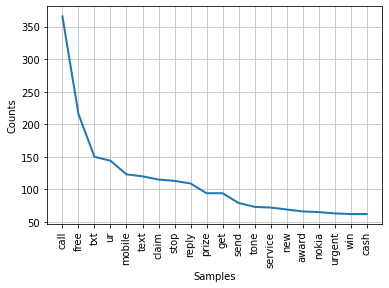

In [163]:
from matplotlib import pyplot as plt
spam_text.plot(20)
plt.show()

In [164]:
spam_freq_dict = spam_text.vocab()
spam_freq_dict.most_common(5)

[('call', 366), ('free', 216), ('txt', 150), ('ur', 144), ('mobile', 123)]

spam text는 call, free, txt 와 같은 단어들이 많이 등장하는 것을 볼 수 있습니다. 

흔히 스팸메세지에서 '어디로 전화주세요'라던가 'ooo이 공짜' 이런 문구들에서 추출됐을 것입니다.

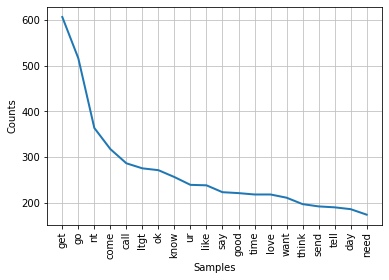

In [165]:
from matplotlib import pyplot as plt
ham_text.plot(20)
plt.show()

In [166]:
ham_freq_dict = ham_text.vocab()
ham_freq_dict.most_common(5)

[('get', 606), ('go', 516), ('nt', 364), ('come', 318), ('call', 287)]

반면 일반메세지에서는 일상적인 단어들이 많이 등장하는 것을 볼 수 있습니다. 

get, go, come 등이 그 예시입니다.

하지만 call 은 스팸/일반 모두에서 다수 등장하는 것을 볼 수 있습니다.

위의 빈도그래프로 이미 파악이 된 사실들이지만 안그려보긴 아쉬우니까 워드클라우드도 한번 그려봅시다.

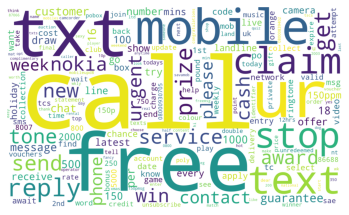

In [167]:
from wordcloud import WordCloud

wc = WordCloud(width=2000, height=1200, background_color="white", random_state=0)
plt.imshow(wc.generate_from_frequencies(spam_freq_dict))
plt.axis("off")
plt.show()

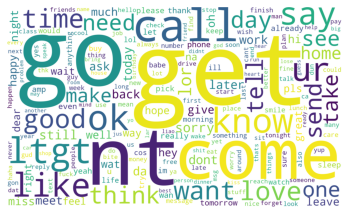

In [168]:
from wordcloud import WordCloud

wc = WordCloud(width=2000, height=1200, background_color="white", random_state=0)
plt.imshow(wc.generate_from_frequencies(ham_freq_dict))
plt.axis("off")
plt.show()

스팸/일반 모두 자주 등장했던 단어인 call이 어떤 문맥상에서 사용되는지 봅시다.

In [169]:
spam_text.concordance("call")

Displaying 25 of 366 matches:
lect receivea 900 prize reward claim call 09061701461 claim code kl341 valid 1
te latest colour mobiles camera free call mobile update co free 08002986030 si
arge 07732584351 rodger burn msg try call reply sms free nokia mobile free cam
e nokia mobile free camcorder please call 08000930705 delivery tomorrow sms ac
tv congrats year special cinema pass call 09061209465 suprman matrix3 starwars
nt review mob award 1500 bonus prize call 09066364589 urgent ur award complime
divorce barbie come ken stuff please call customer service representative 0800
ekend draw show 1000 prize guarantee call 09064012160 claim code k52 valid 12h
how 786 unredeemed bonus point claim call 08719180248 identifier code 45239 ex
 caller prize 5903 final try contact call landline 09064019788 box42wr29c 150p
elect receive 350 award match please call 08712300220 quote claim code 4041 st
ement new years delivery wait please call 07046744435 arrange delivery winner 
eekend draw show 900 p

In [170]:
ham_text.concordance("call")

Displaying 25 of 287 matches:
 endow ltgt inch callsmessagesmissed call nt get hep immunisation nigeria fair
herawat yesterday find lturlgt sorry call later meet tell reach yesgauti sehwa
 something xx kkwhere youhow perform call wait machan call free thats cool gen
here youhow perform call wait machan call free thats cool gentleman treat dign
gt still look job much ta earn sorry call later call ah ok way home hi hi plac
ok job much ta earn sorry call later call ah ok way home hi hi place man yup n
y home hi hi place man yup next stop call later nt network urgnt sms real get 
hope u well del r bak long time give call sum time lucyxx kkhow much cost home
ime lucyxx kkhow much cost home dear call tmorrowpls accomodate first answer q
wer question haf msn yijuehotmailcom call meet check room befor activities get
s staff name take class us ummmawill call check inour life begin qatar pls pra
 get time hop ard ya go free abt muz call discuss liao time come later bloody 
night let know get mon

***
이제부터는 토큰화된 단어들을 임베딩하고 

이를 이용해 스팸분류모델을 만들어보도록 하겠습니다.

## Embedding

- 수업에서 다룬 임베딩 방법에는 One-hot encoding, CBOW, Skip-gram, GloVe, FastText가 있었습니다. 다양한 시도와 '비교' 결과를 함께 적어주세요! 파라미터를 조정해가는 과정도 해석에 도움이 될 수 있겠죠 :)

In [4]:
len(max(spam_text, key=lambda x: len(x)))

80

### Word2Vec

In [10]:
from gensim.models import Word2Vec
cbow_model = Word2Vec(sentences=spam_text, size=100, window=5, min_count=3, workers=4, sg=0)

여기서 Word2Vec의 하이퍼파라미터값은 다음과 같습니다.

size = 워드 벡터의 특징 값. 즉, 임베딩 된 벡터의 차원.

window = 윈도우 크기

min_count = 단어 최소 빈도 수 제한 (빈도가 적은 단어들은 학습하지 않는다.)

workers = 학습을 위한 프로세스 수

sg = 0은 CBOW, 1은 Skip-gram.

In [11]:
# 완성된 임베딩 매트릭스의 크기 확인
cbow_model.wv.vectors.shape

(2468, 100)

In [12]:
cbow_model.wv.most_similar("call")

[('reply', 0.9999297857284546),
 ('txt', 0.9999266862869263),
 ('text', 0.9999202489852905),
 ('free', 0.999920129776001),
 ('mobile', 0.9999194145202637),
 ('show', 0.9999182224273682),
 ('holiday', 0.9999089241027832),
 ('phone', 0.999908447265625),
 ('chat', 0.9999076128005981),
 ('stop', 0.9999076128005981)]

In [13]:
from gensim.models import Word2Vec
skip_gram_model = Word2Vec(sentences=spam_text, size=100, window=5, min_count=3, workers=4, sg=1)

여기서 Word2Vec의 하이퍼파라미터값은 다음과 같습니다.

size = 워드 벡터의 특징 값. 즉, 임베딩 된 벡터의 차원.

window = 윈도우 크기

min_count = 단어 최소 빈도 수 제한 (빈도가 적은 단어들은 학습하지 않는다.)

workers = 학습을 위한 프로세스 수

sg = 0은 CBOW, 1은 Skip-gram.

In [14]:
skip_gram_model.wv.most_similar("call")

[('2000', 0.9920142292976379),
 ('line', 0.9914974570274353),
 ('award', 0.991483747959137),
 ('1000', 0.9914268255233765),
 ('guarantee', 0.9912824630737305),
 ('urgent', 0.9901219606399536),
 ('cash', 0.9863020777702332),
 ('number', 0.9848052263259888),
 ('customer', 0.9845677614212036),
 ('land', 0.9844015836715698)]

In [15]:
skip_gram_model.wv.most_similar("electro") 
#사전데이터에 없는 단어는 임베딩형성이 불가능

KeyError: "word 'electro' not in vocabulary"

### FastText

In [203]:
from gensim.models import FastText
fast_text_model = FastText(spam_text, size=100, window=5, min_count=5, workers=4, sg=1)

In [205]:
fast_text_model.wv.most_similar("call")

[('caller', 0.9971837997436523),
 ('land', 0.9948933720588684),
 ('code', 0.994674801826477),
 ('line', 0.9945178031921387),
 ('bonus', 0.9944878220558167),
 ('valid', 0.994390070438385),
 ('toclaim', 0.9941724538803101),
 ('contact', 0.9939876198768616),
 ('number', 0.9934494495391846),
 ('landline', 0.9929897785186768)]

In [204]:
fast_text_model.wv.most_similar("electro")

[('callers', 0.935923159122467),
 ('reward', 0.9356210231781006),
 ('3030', 0.9355997443199158),
 ('lect', 0.9354581236839294),
 ('cal', 0.9352169036865234),
 ('co', 0.9351556301116943),
 ('attempt', 0.9349433183670044),
 ('12hrs', 0.9347693920135498),
 ('2nd', 0.9344429969787598),
 ('yr', 0.9342733025550842)]

In [ ]:
fast_text_model2 = FastText(spam_text, size=300, window=5, min_count=5, workers=4, sg=1)

In [ ]:
fast_text_model2.wv.most_similar("call")

### Glove

In [206]:
from glove import Corpus, Glove

In [207]:
corpus = Corpus() 
corpus.fit(spam_text, window=5)
# 훈련 데이터로부터 GloVe에서 사용할 동시 등장 행렬 생성

glove = Glove(no_components=100, learning_rate=0.05)
glove.fit(corpus.matrix, epochs=20, no_threads=4, verbose=True)
glove.add_dictionary(corpus.dictionary)
# 학습에 이용할 쓰레드의 개수는 4로 설정, 에포크는 20.

Performing 20 training epochs with 4 threads
Epoch 0
Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 10
Epoch 11
Epoch 12
Epoch 13
Epoch 14
Epoch 15
Epoch 16
Epoch 17
Epoch 18
Epoch 19


In [13]:
glove.most_similar("call")

[('mobile', 0.9927324667798305), ('reply', 0.990379982495731), ('phone', 0.9858483302462951), ('text', 0.9846465629983076)]


## 본인이 도출해낸 해석을 적어주세요!

- 유사도, Wordcloud, 이진 분류 모델, Plot 뭐든 상관없으니 분명하고 인상적인 해석을 적어주시면 됩니다.